In [1]:
# Importing the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_circles
import torch
import torch.nn as nn

In [2]:
# Making a circle dataset
samples = 1000
X,y = make_circles(samples,noise=0.03,random_state=42)

In [3]:
circledataset = pd.DataFrame({"X1":X[:,0],
                             "X2":X[:,1],
                             "labels":y})
circledataset.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


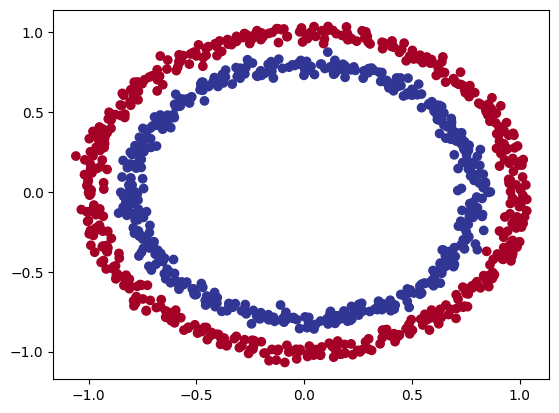

In [4]:
# Plotting the data on a scatter graph
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X = np.array(X)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [7]:
# Splitting the data unbto train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=50)

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
# Creation of a circle model having 2 layers
class circlemodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=2, out_features=8)
        self.linear_layer_2 = nn.Linear(in_features=8, out_features=1)
        
    def forward(self, x):
        return self.linear_layer_2(self.linear_layer_1(x))
        
first_model = circlemodel().to(device)
first_model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.5521,  0.3851],
                      [-0.4138, -0.2683],
                      [-0.3444,  0.5164],
                      [ 0.0189, -0.1930],
                      [-0.4013,  0.1327],
                      [ 0.2095, -0.3551],
                      [ 0.6469, -0.1216],
                      [ 0.3266,  0.2591]], device='cuda:0')),
             ('linear_layer_1.bias',
              tensor([ 0.1167, -0.5569, -0.5550,  0.6330,  0.0872, -0.6444,  0.2892, -0.6400],
                     device='cuda:0')),
             ('linear_layer_2.weight',
              tensor([[-0.0714, -0.2246,  0.0854,  0.0245, -0.2086,  0.2245, -0.0156,  0.0522]],
                     device='cuda:0')),
             ('linear_layer_2.bias', tensor([0.1906], device='cuda:0'))])

In [10]:
# Replicate circlemodel with nn.Sequential

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
untrained_preds = first_model(X_test.to(device))

In [12]:
X_test, y_test

(tensor([[-9.8013e-01,  2.2535e-01],
         [ 4.4087e-01, -8.9443e-01],
         [-1.2721e-01,  1.0223e+00],
         [ 5.6947e-01,  8.4477e-01],
         [-7.7903e-01, -6.5524e-01],
         [-6.7085e-01,  7.2465e-01],
         [-4.4009e-01,  6.6556e-01],
         [-7.7952e-01,  1.4914e-01],
         [-9.3423e-01, -2.4568e-01],
         [-7.7109e-01, -5.1090e-02],
         [ 9.5598e-01, -1.3703e-01],
         [ 2.5933e-01, -1.0015e+00],
         [-6.0157e-01, -5.1045e-01],
         [-7.3073e-01,  3.4332e-01],
         [-8.4016e-01,  1.9682e-01],
         [ 6.2276e-01,  7.7377e-01],
         [-9.9724e-01,  3.3344e-01],
         [ 7.1335e-01,  8.7981e-03],
         [ 9.7026e-01,  3.6688e-01],
         [ 9.4160e-01, -3.8004e-01],
         [-5.1190e-01, -6.0790e-01],
         [-7.3152e-01, -2.9761e-01],
         [ 7.3922e-01, -3.4567e-01],
         [ 3.5267e-01, -9.5096e-01],
         [ 1.8021e-01,  7.9970e-01],
         [-7.7164e-01,  2.3249e-01],
         [-7.3173e-01, -1.2368e-01],
 

In [13]:
torch.cuda.is_available()

True

In [14]:
# Input of loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=first_model.parameters(), lr=0.1)

In [15]:
# Function to test the accuracy of the model
def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct / len(y_pred) * 100)
    return accuracy

In [16]:
y_pred_probs = torch

In [17]:
first_model.eval()
with torch.inference_mode():
    y_logits = first_model(X_test.to(device))[:5]
y_logits

tensor([[-0.0889],
        [ 0.1639],
        [ 0.0337],
        [ 0.1503],
        [-0.0388]], device='cuda:0')

In [18]:
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()
y_test[:5]

tensor([ True, False,  True,  True,  True], device='cuda:0')


tensor([0., 0., 0., 0., 0.])

In [19]:
# Fit the Model
torch.manual_seed(60)
torch.cuda.manual_seed(60)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss_calc = loss_fn(y_logits, y_train)
    acc_calc = acc_fn(y_true=y_preds, y_pred = y_pred) 
    
    optim.zero_grad()
    
    loss_calc.backward()
    
    optim.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = acc_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss_calc:.5f} | Acc: {acc_calc:.2f}% | Test loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 10 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 20 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 30 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 40 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 50 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 60 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 70 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 80 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%
Epoch: 90 | Loss: 0.71620 | Acc: 249.50% | Test loss: 0.71015 | Test Acc: 50.50%


In [20]:
import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


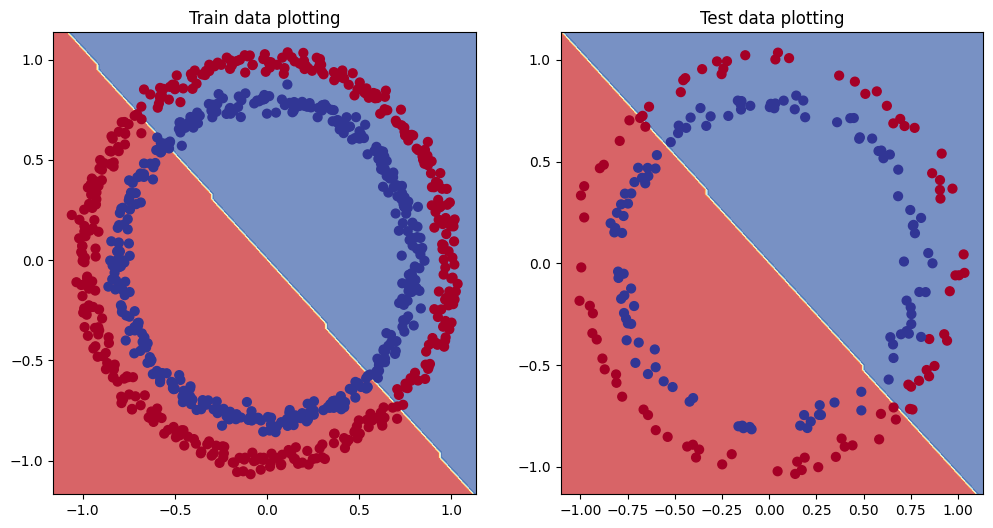

In [21]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train data plotting")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test data plotting")
plot_decision_boundary(model_1, X_test, y_test)

In [22]:
# Creation of another circle model but having 3 layers
class circlemodel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu_layer = nn.ReLU()
        
    def forward(self, x):
        return self.layer_3(self.relu_layer(self.layer_2(self.relu_layer(self.layer_1(x)))))
    
model_2 = circlemodel2()
model_2

circlemodel2(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu_layer): ReLU()
)

In [23]:
# Input of Loss Function and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [24]:
# Fit the model
torch.manual_seed(42)
epochs = 1500

model_2 = model_2.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_2(X_train.to(device)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits).to(device))
    
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acc_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69434, Accuracy: 48.62% | Test Loss: 0.69077, Test Accuracy: 55.50%
Epoch: 100 | Loss: 0.68765, Accuracy: 52.00% | Test Loss: 0.69572, Test Accuracy: 41.00%
Epoch: 200 | Loss: 0.68441, Accuracy: 53.50% | Test Loss: 0.69552, Test Accuracy: 43.00%
Epoch: 300 | Loss: 0.68053, Accuracy: 54.12% | Test Loss: 0.69450, Test Accuracy: 46.50%
Epoch: 400 | Loss: 0.67521, Accuracy: 55.00% | Test Loss: 0.69122, Test Accuracy: 46.50%
Epoch: 500 | Loss: 0.66845, Accuracy: 58.50% | Test Loss: 0.68760, Test Accuracy: 50.50%
Epoch: 600 | Loss: 0.65917, Accuracy: 64.38% | Test Loss: 0.68060, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.64530, Accuracy: 67.88% | Test Loss: 0.66797, Test Accuracy: 62.00%
Epoch: 800 | Loss: 0.62176, Accuracy: 73.25% | Test Loss: 0.64213, Test Accuracy: 65.50%
Epoch: 900 | Loss: 0.57493, Accuracy: 84.62% | Test Loss: 0.59391, Test Accuracy: 81.00%
Epoch: 1000 | Loss: 0.49833, Accuracy: 90.25% | Test Loss: 0.51577, Test Accuracy: 89.50%
Epoch: 1100 | Loss: 0.

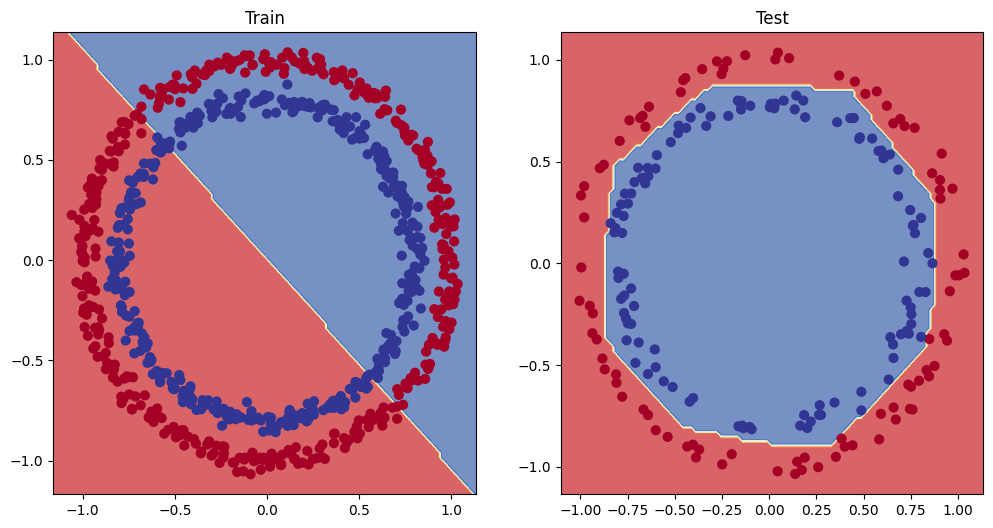

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_2 = has non-linearity

In [37]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

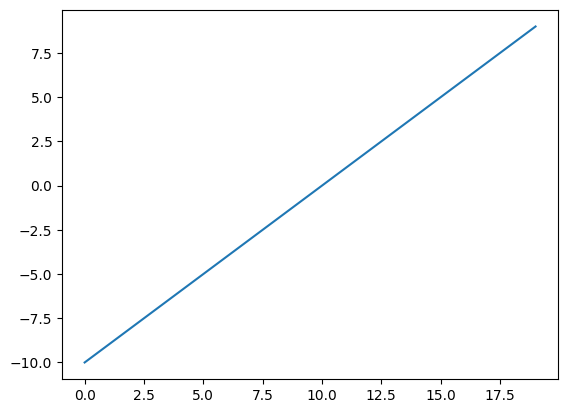

In [27]:
A

plt.plot(A)

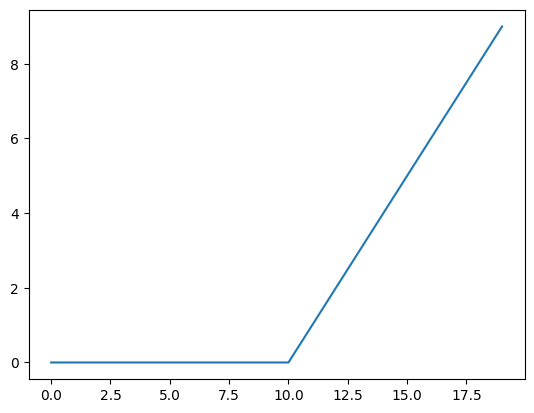

In [28]:
# Plot relu activation function
def relu(x:torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

relu(A)

plt.plot(relu(A))

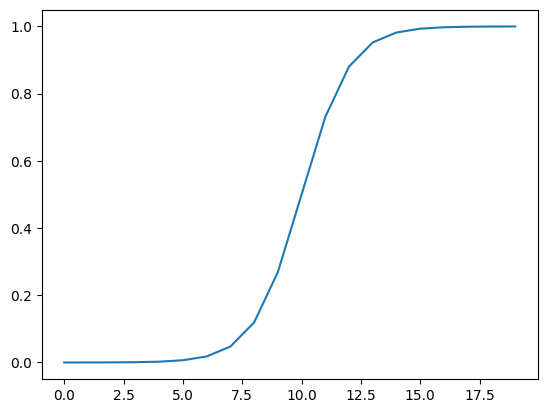

In [29]:
# Same for Sigmoid
def sigmoid(x):
    return 1 / (1+torch.exp(-x))

plt.plot(sigmoid(A));

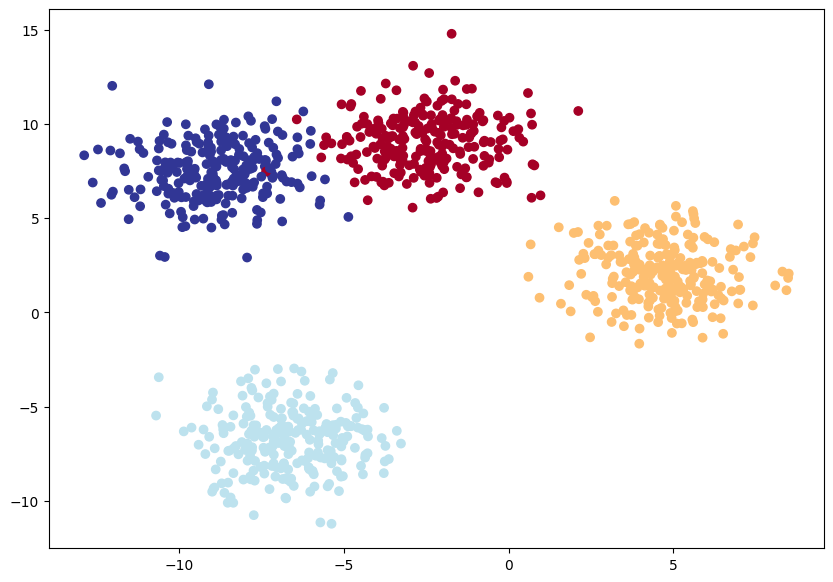

In [30]:
# Creating a Multi-class classification model
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std = 1.5,
                           random_state = RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=42)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu);

In [38]:
# Checking device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
# Building a multi-class classifier model
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        """Initializes multi-class classification model"""
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features),
        )

    def forward(self,x):
        return self.linear_layer_stack(x)
# Create an instance of blob model and send it to the target device
model_4 = BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [40]:
X_blob_train.shape,y_blob_train[:5]
torch.unique(y_blob_train)

tensor([0, 1, 2, 3], device='cuda:0')

In [34]:
# Creating a Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),lr=0.01)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [41]:
# Convert model predicitions probabilty to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 0, 0, 0, 0], device='cuda:0')

In [43]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    acc = correct / len(y_true)
    return acc

In [44]:
# Creating a traing loop and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train,X_blob_test,y_blob_train,y_blob_test = X_blob_train.to(device),X_blob_test.to(device),y_blob_train.to(device),y_blob_test.to(device)

for epoch in range(epochs):

    model_4.train()
    
    y_logits = model_4(X_blob_train)
    
    y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        loss = loss_fn(test_logits,y_blob_test)
        acc = accuracy_fn(y_pred=test_pred,y_true=y_blob_test)

    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")

Epoch:0 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:10 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:20 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:30 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:40 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:50 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:60 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:70 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:80 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 
Epoch:90 | Loss: 1.15549, Acc: 0.35% | Test loss: 0.08667, Test Acc: 100.00% 


In [45]:
# Make predicitions
model_4.eval()
with torch.inference_mode():
    y_logits  = model_4(X_blob_test)

y_logits[:10]

y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0')

In [46]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [47]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

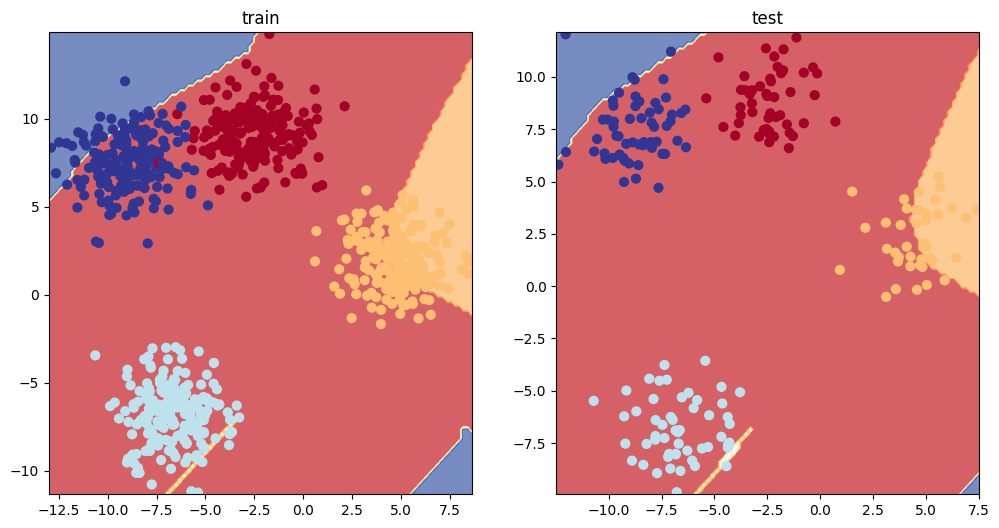

In [52]:
# Visualizing the data on a scatter graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.show()